<a href="https://colab.research.google.com/github/LinusTC/MLP-CW3/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cotton Leaf Disease Classification

In [1]:
'''! pip install kaggle
from google.colab import drive
drive.mount('/content/drive')
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/Kaggle\ API/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json'''

<>:1: SyntaxWarning: invalid escape sequence '\ '
<>:1: SyntaxWarning: invalid escape sequence '\ '
C:\Users\tongc\AppData\Local\Temp\ipykernel_18336\2672191732.py:1: SyntaxWarning: invalid escape sequence '\ '
  '''! pip install kaggle


"! pip install kaggle\nfrom google.colab import drive\ndrive.mount('/content/drive')\n! mkdir ~/.kaggle\n!cp /content/drive/MyDrive/Kaggle\\ API/kaggle.json ~/.kaggle/kaggle.json\n! chmod 600 ~/.kaggle/kaggle.json"

### 1.0 Imports

In [2]:
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

### 1.1 Kaggle Imports

In [3]:
import kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("seroshkarim/cotton-leaf-disease-dataset")

print("Path to dataset files:", path)

c:\Users\tongc\anaconda3\envs\MLP\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\tongc\.cache\kagglehub\datasets\seroshkarim\cotton-leaf-disease-dataset\versions\1


In [4]:
'''import os
print(os.listdir("Cotton Plant Images"))
path = "Cotton Plant Images"'''

'import os\nprint(os.listdir("Cotton Plant Images"))\npath = "Cotton Plant Images"'

### 2. Load Data

In [5]:
transform = transforms.Compose([
    transforms.Resize(384),
    transforms.CenterCrop(350),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(path, transform=transform)

train_size = len(dataset) // 2
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # No shuffle for testing

labels_map = {
    0: "bacterial_blight",
    1: "curl_virus",
    2: "fussarium_wilt",
    3: "healthy",
}

image, label = train_dataset[0]
image.size()

torch.Size([3, 350, 350])

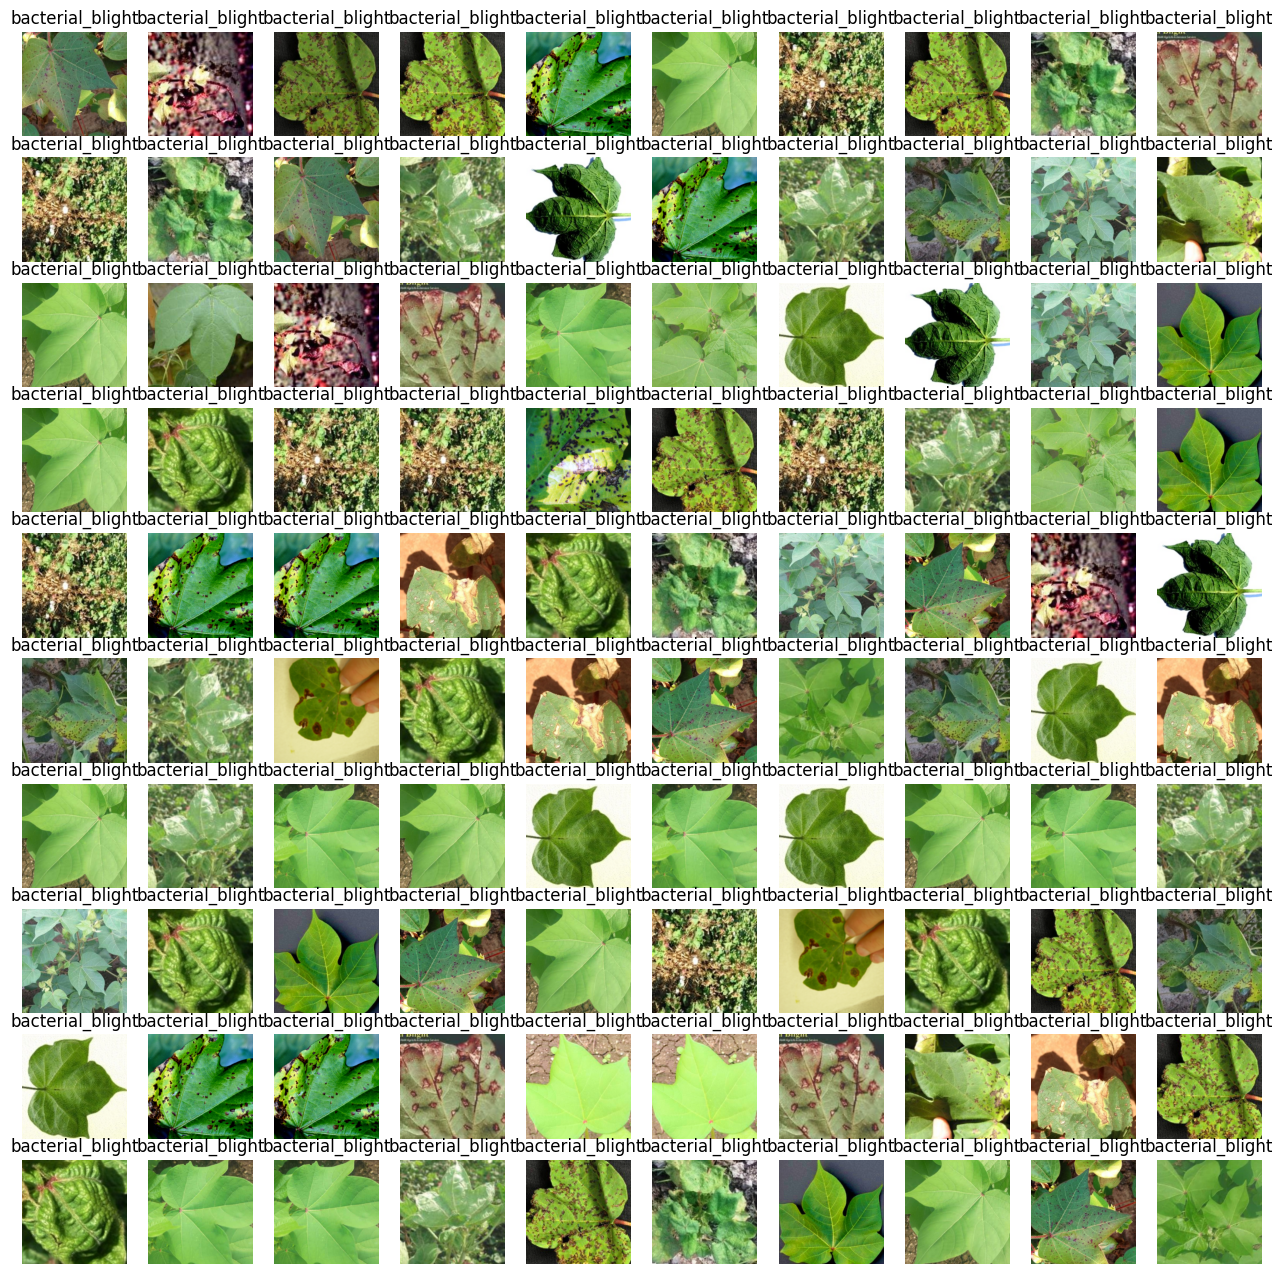

In [6]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Display Sample Images
figure = plt.figure(figsize=(16, 16))
cols, rows = 10, 10

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(images), size=(1,)).item()
    img, label = images[sample_idx], labels[sample_idx].item()

    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")

    img = img.permute(1, 2, 0)  # Convert (C, H, W) to (H, W, C) for display
    plt.imshow(img)

plt.show()


### 3. Object Detection Leaf/Plant

In [7]:
# Nats Code



## 4. Image Classification

### 4.1 Base Model

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork (nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 32, 7) #(32, 344, 344)
        self.pool = nn.MaxPool2d (2, 2) #(32, 172, 172)
        self.conv2 = nn.Conv2d(32, 64, 7) #(64, 166, 166) #(64, 83, 83)
        self.conv3 = nn.Conv2d (64, 128, 7) # Output: (256, 76, 76) #(128, 38, 38)
        self.conv4 = nn.Conv2d(128, 256, 7) #(256, 32, 32) #(256, 16, 16)

        self.fc1 = nn.Linear(256 * 16 * 16, 8192)
        self.fc2 = nn.Linear(8192, 1024)
        self.fc3 = nn.Linear(1024, 128)
        self.fc4 = nn.Linear(128, 4)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return x

In [10]:
training_net = NeuralNetwork()

loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(training_net.parameters(), lr=0.001)

In [11]:
import torch
from tqdm import tqdm

num_epochs = 50

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
training_net.to(device)

for epoch in range(num_epochs):
    loop = tqdm(enumerate(train_loader), total=len(train_loader), leave=False)

    running_loss = 0.0
    for i, data in loop:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = training_net(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        loop.set_description(f"Epoch [{epoch+1}/{num_epochs}]")
        loop.set_postfix(loss=loss.item())

    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {running_loss/len(train_loader):.6f}")

loop.close()


Epoch [1/50] Loss: 1.409176


Epoch [2/50] Loss: 1.382711


Epoch [3/50] Loss: 1.356842


Epoch [4/50] Loss: 1.331699


Epoch [5/50] Loss: 1.307132


Epoch [6/50] Loss: 1.283099


Epoch [7/50] Loss: 1.259444


Epoch [8/50] Loss: 1.235860


Epoch [9/50] Loss: 1.212150


Epoch [10/50] Loss: 1.188023


Epoch [11/50] Loss: 1.163046


Epoch [12/50] Loss: 1.136313


Epoch [13/50] Loss: 1.106093


Epoch [14/50] Loss: 1.067954


Epoch [15/50] Loss: 1.008201


Epoch [16/50] Loss: 0.868756


Epoch [17/50] Loss: 0.433693


Epoch [18/50] Loss: 0.072645


Epoch [19/50] Loss: 0.021417


Epoch [20/50] Loss: 0.010984


Epoch [21/50] Loss: 0.007042


Epoch [22/50] Loss: 0.005067


Epoch [23/50] Loss: 0.003907


Epoch [24/50] Loss: 0.003127


Epoch [25/50] Loss: 0.002634


Epoch [26/50] Loss: 0.002220


Epoch [27/50] Loss: 0.001936


Epoch [28/50] Loss: 0.001694


Epoch [29/50] Loss: 0.001534


Epoch [30/50] Loss: 0.001366


Epoch [31/50] Loss: 0.001240


Epoch [32/50] Loss: 0.001135


Epoch [33/50] Loss: 0.001048


Epoch [34/50] Loss: 0.000969


Epoch [35/50] Loss: 0.000910


Epoch [36/50] Loss: 0.000844


Epoch [37/50] Loss: 0.000788


Epoch [38/50] Loss: 0.000743


Epoch [39/50] Loss: 0.000709


Epoch [40/50] Loss: 0.000665


Epoch [41/50] Loss: 0.000636


Epoch [42/50] Loss: 0.000602


Epoch [43/50] Loss: 0.000572


Epoch [44/50] Loss: 0.000549


Epoch [45/50] Loss: 0.000531


Epoch [46/50] Loss: 0.000501


Epoch [47/50] Loss: 0.000486


Epoch [48/50] Loss: 0.000463


Epoch [49/50] Loss: 0.000444


Epoch [50/50] Loss: 0.000428


In [13]:
torch.save(training_net.state_dict(), 'trained_net.pth')

In [16]:
test_net = NeuralNetwork()

test_net.load_state_dict(torch.load('trained_net.pth'))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_net.to(device)

test_net.eval()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Testing"):
        images, labels = images.to(device), labels.to(device)

        outputs = test_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)

        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the test images: {accuracy:.2f}%')


<ipython-input-16-3616af546651>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_net.load_state_dict(torch.load('trained_net.pth'))
Testing: 100%|██████████| 27/27 [00:

Accuracy of the network on the test images: 100.00%


### 4.2 VGG16 Model

In [12]:
import torch.nn as nn
import torch.nn.functional as F

class VGG16(nn.Module):
    def __init__(self, num_classes=4):
        super(VGG16, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(10*10*512, 4096),  # Adjusted from 7*7*512 to 10*10*512
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [13]:
num_classes = 4
num_epochs = 100
batch_size = 32
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = VGG16(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

In [15]:
total_step = len(train_loader)
# training loop
for epoch in range(num_epochs):
    train_loop = tqdm(enumerate(train_loader), total=total_step, desc=f'Epoch {epoch+1}/{num_epochs}')
    for i, (images, labels) in train_loop:  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Update tqdm loop display
        train_loop.set_postfix(loss=loss.item())

    # Validation
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        validation_loop = tqdm(test_loader, desc='Validating')
        for images, labels in validation_loop:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del images, labels, outputs
    
    accuracy = 100 * correct / total
    print('Accuracy of the network on the {} validation images: {:.2f} %'.format(total, accuracy))
    model.train()


Epoch 1/100:   4%|▎         | 1/27 [00:44<19:05, 44.07s/it, loss=1.56]


KeyboardInterrupt: 

In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        del images, labels, outputs

    print('Accuracy of the network on the {} test images: {} %'.format(10000, 100 * correct / total))   